In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import itertools
import numpy as np

from rmexp import dbutils, config, cvutils
from rmexp.schema import models

<IPython.core.display.Javascript object>


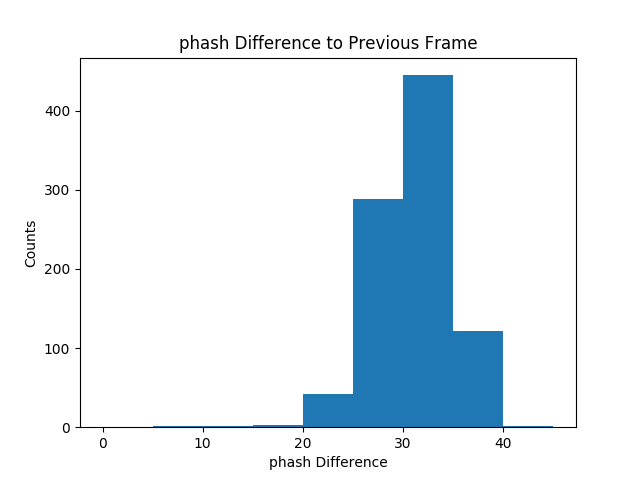

Text(0.5,1,'phash Difference to Previous Frame')

In [2]:
import collections
import json

%matplotlib notebook

# a distance of <5 can be thought as the same image
# http://www.hackerfactor.com/blog/index.php?/archives/432-Looks-Like-It.html
# alternative methods of performing image similarity search is BOVW and correlation search
sess = dbutils.get_session()
results = [item.val for item in sess.query(models.SS).filter(models.SS.name=="lego_0_905_phash").all()]
assert(len(results)==1)
phash_diffs = json.loads(results[0])


diff=30


<IPython.core.display.Javascript object>


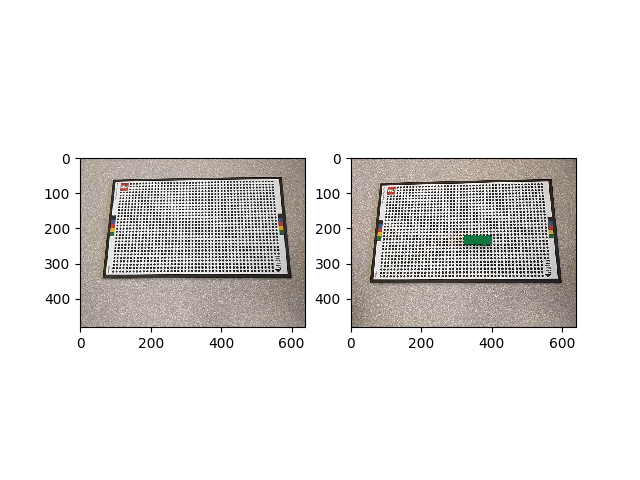

diff=26


<IPython.core.display.Javascript object>


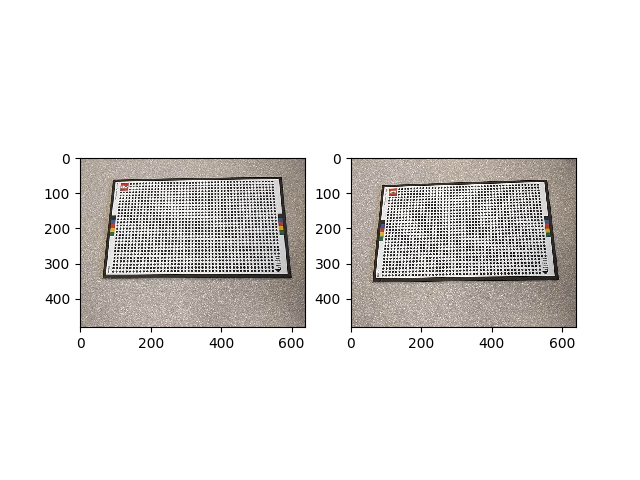

diff=24


<IPython.core.display.Javascript object>


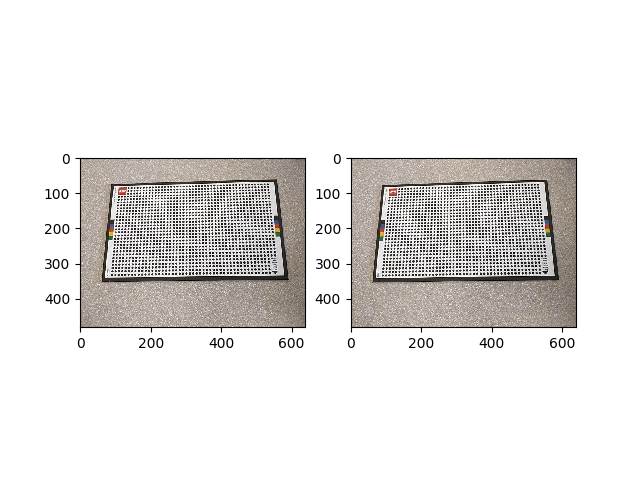

diff=16


<IPython.core.display.Javascript object>


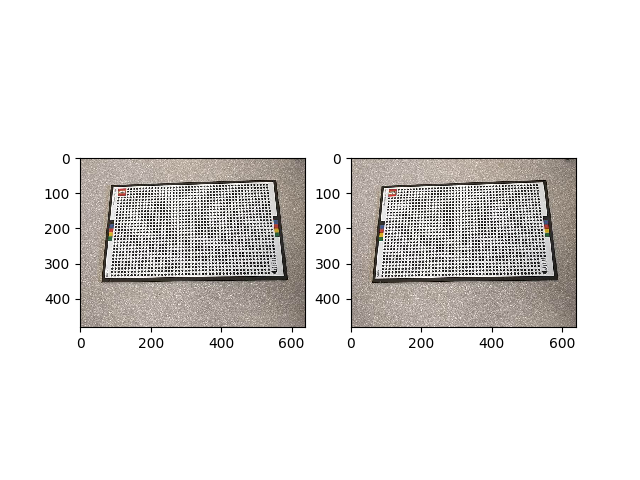

In [4]:
import os
import cv2
import matplotlib.image as mpimg


%matplotlib notebook

trace_dir = '../data/traces'
trace_name = 'lego_0_905'
idx = 1

def phash_diff(idx1, idx2):
    sess = dbutils.get_session()
    h1 = sess.query(models.SS).filter(models.SS.name=="{}-f{}-phash".format(trace_name, idx1)).one().val
    h2 = sess.query(models.SS).filter(models.SS.name=="{}-f{}-phash".format(trace_name, idx2)).one().val
    sess.close()
    hash1 = cvutils.ImageHash.from_string(h1)
    hash2 = cvutils.ImageHash.from_string(h2)
    return hash1 - hash2

def show_two_image_phash_diff(idx1, idx2):
    print('diff={}'.format(phash_diff(idx1, idx2)))
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(mpimg.imread(os.path.join(trace_dir, trace_name, '{:010d}.jpg'.format(idx1))))
    plt.subplot(1, 2, 2)
    plt.imshow(mpimg.imread(os.path.join(trace_dir, trace_name, '{:010d}.jpg'.format(idx2))))

show_two_image_phash_diff(48, 80)
show_two_image_phash_diff(48, 52)
show_two_image_phash_diff(51, 52)
show_two_image_phash_diff(52, 53)


## Plot the histogram of phash difference of adjacent frames

When sampling at high frequency 30 FPS, the phash is able to filter out much more frames than low FPS.

<IPython.core.display.Javascript object>


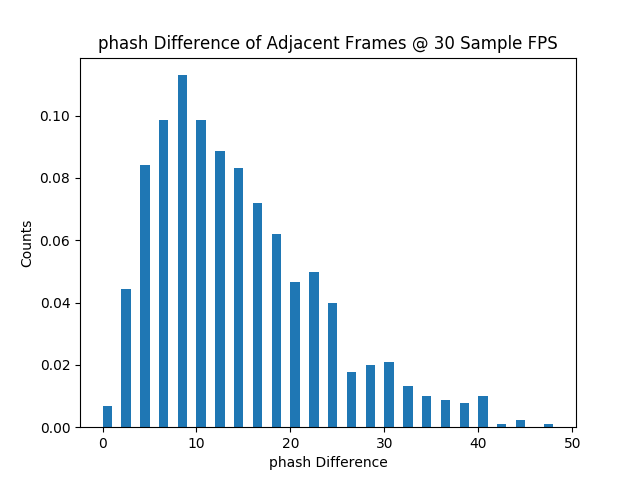

<IPython.core.display.Javascript object>


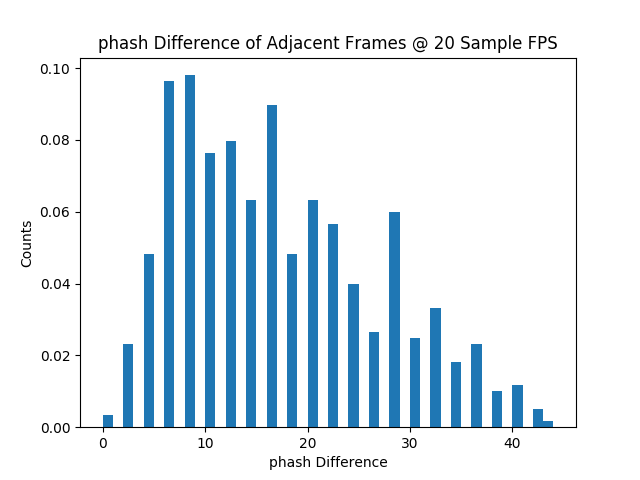

<IPython.core.display.Javascript object>


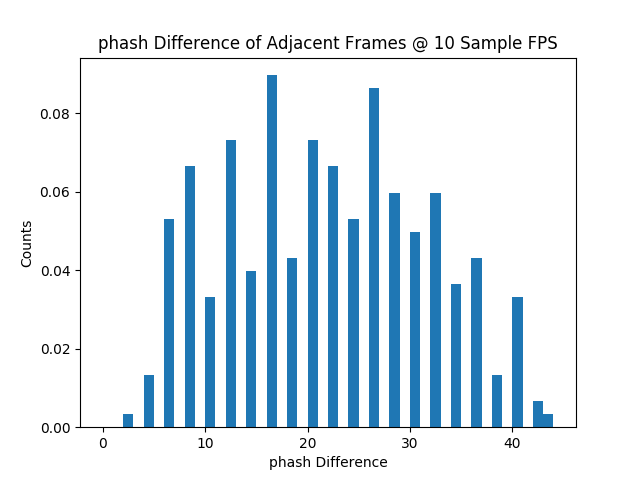

<IPython.core.display.Javascript object>


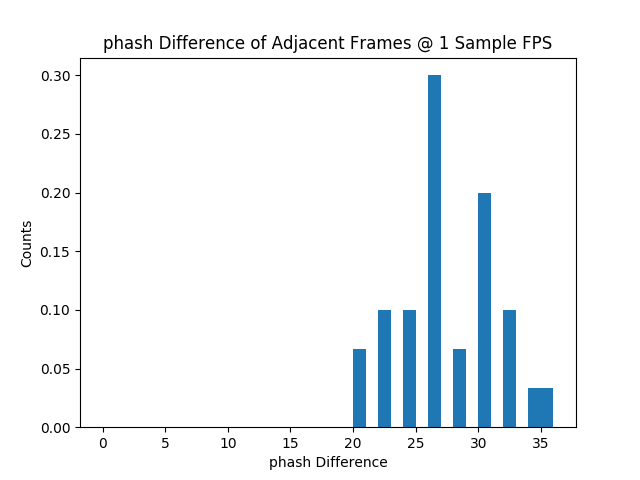

In [21]:
import os

%matplotlib notebook

trace_dir = '../data/traces'
trace_name = 'lego_0_905'

def plot_hist_phash_diff(sample_fps=30):
    sample_interval = 30.0 / sample_fps
    idx = 1
    phash_diffs = []
    while int(idx + sample_interval) < 905:
        diff = phash_diff(int(idx), int(idx+sample_interval))
        phash_diffs.append(diff)
        idx += sample_interval
    plt.figure()
    plt.hist(phash_diffs, bins=range(0, max(phash_diffs) + 1, 1), density=True);
    plt.ylabel('Counts')
    plt.xlabel('phash Difference')
    plt.title('phash Difference of Adjacent Frames @ {} Sample FPS'.format(sample_fps))

plot_hist_phash_diff(sample_fps=30)
plot_hist_phash_diff(sample_fps=20)
plot_hist_phash_diff(sample_fps=10)
plot_hist_phash_diff(sample_fps=1)